#  PREDICTION OF DIABETES BASED ON DIAGNOSTIC MEASURES

# 1. DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA on Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.ndim

2

In [6]:
dataset.size

6912

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Let’s Visualise the Some columns and compare them

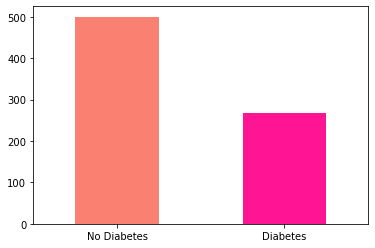

In [11]:
dataset["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

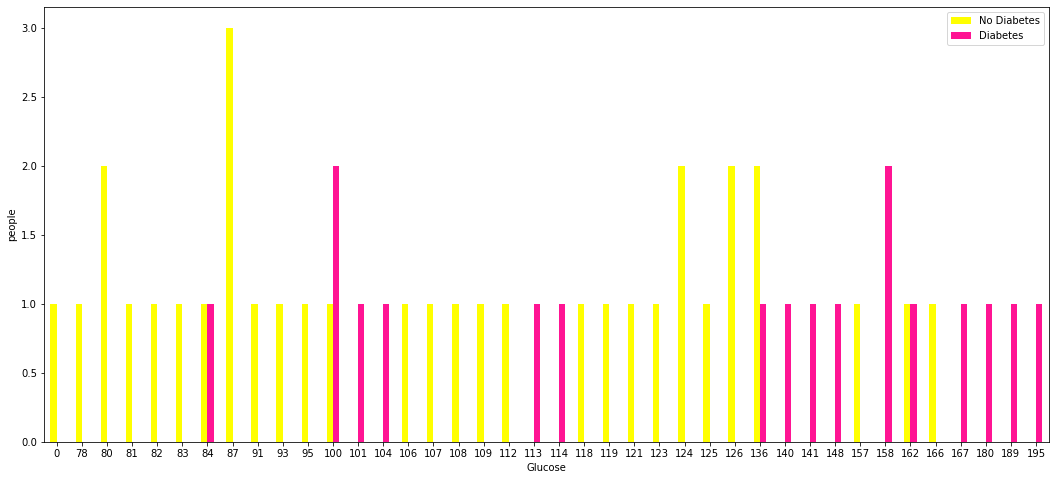

In [12]:
# Comparing Glucose with the Outcome
pd.crosstab(dataset.Glucose[::15],dataset.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

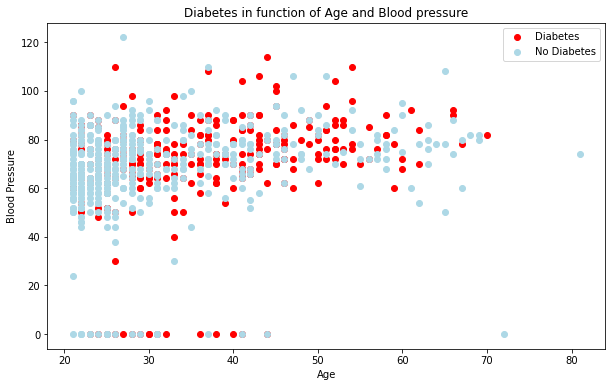

In [13]:
#find out Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(dataset.Age[dataset.Outcome==1],dataset.BloodPressure[dataset.Outcome==1],c="Red");
# Scatter with negative example
plt.scatter(dataset.Age[dataset.Outcome==0],dataset.BloodPressure[dataset.Outcome==0],c="lightblue");
# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

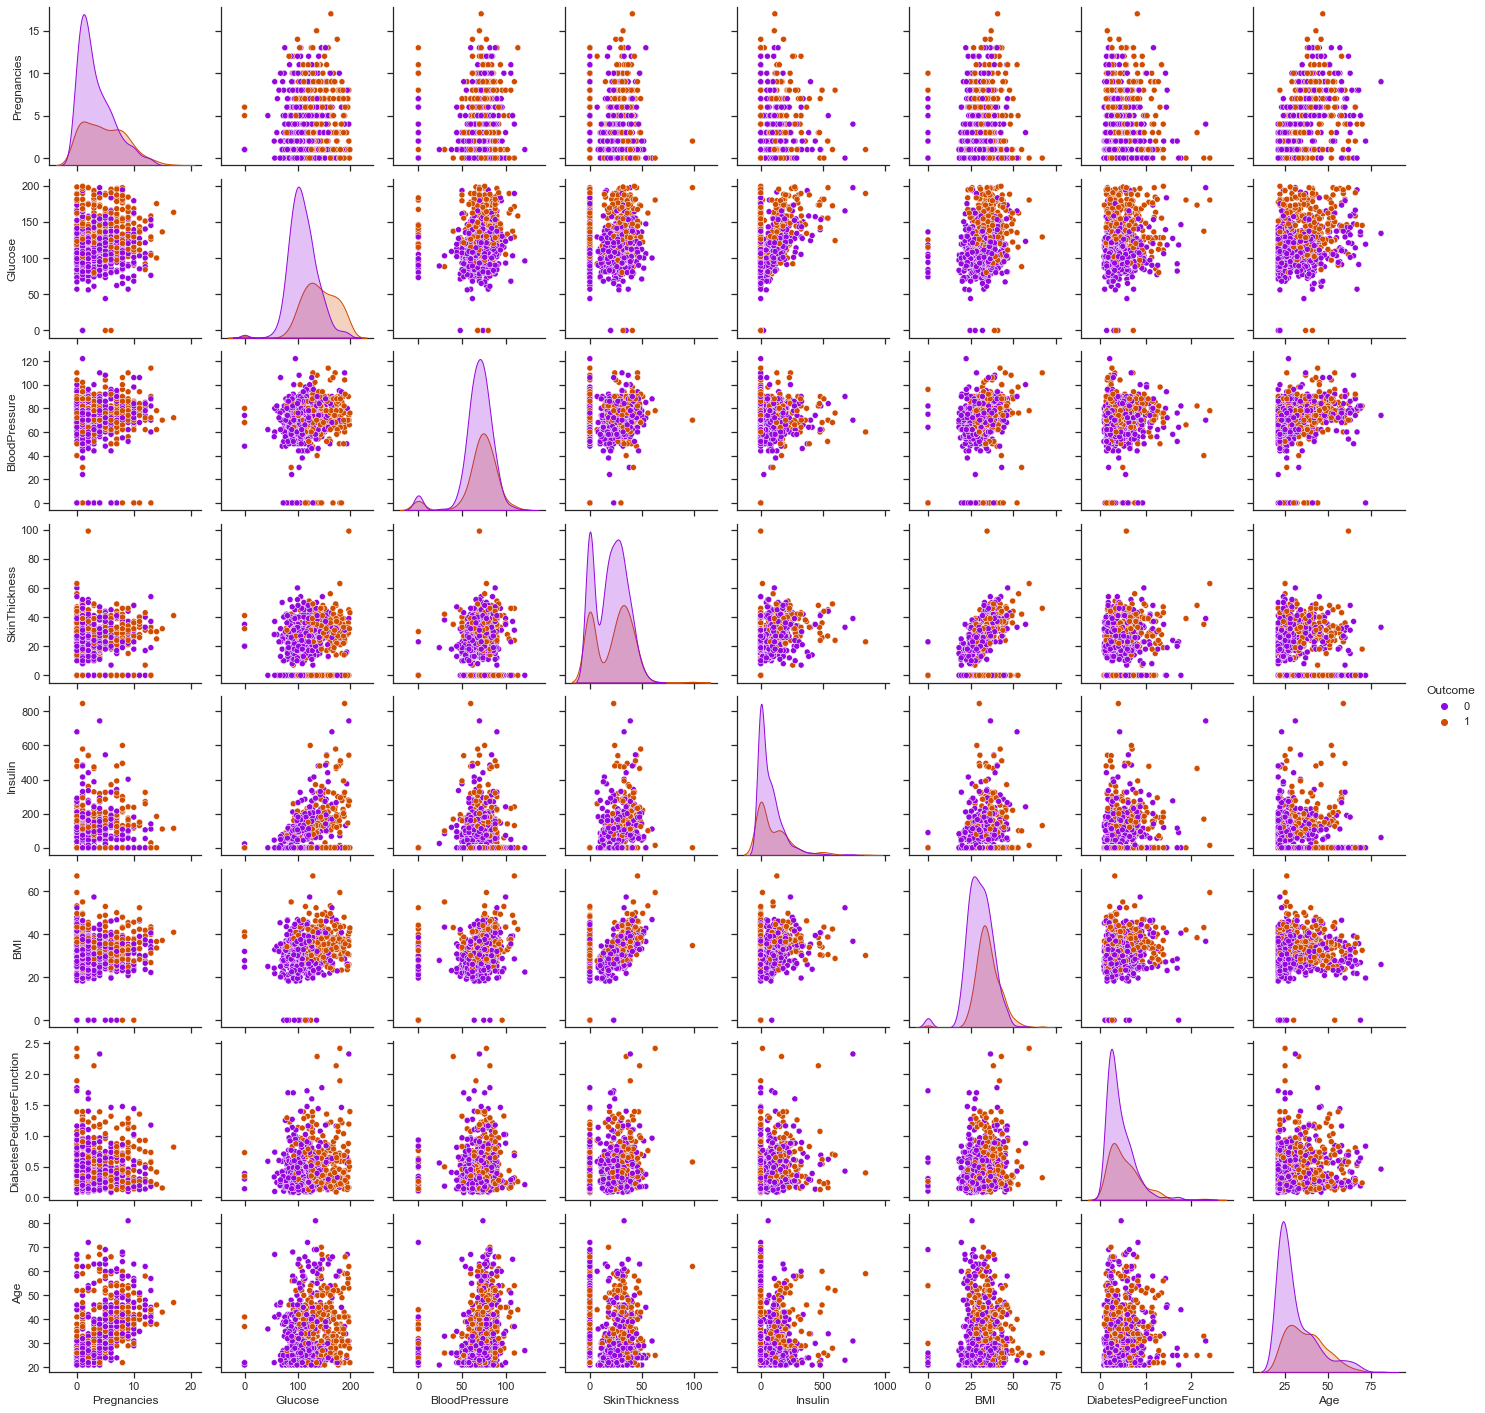

In [14]:
## Pairplotting of dataframe
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset, hue='Outcome', palette='gnuplot');

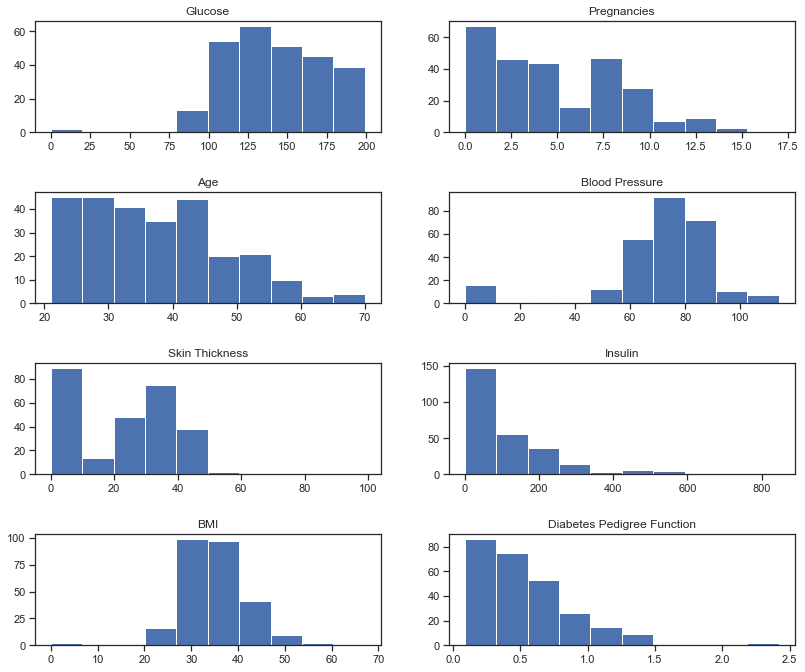

In [15]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(dataset.Glucose[dataset.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(dataset.Pregnancies[dataset.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(dataset.Age[dataset.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(dataset.BloodPressure[dataset.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(dataset.SkinThickness[dataset.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(dataset.Insulin[dataset.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(dataset.BMI[dataset.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(dataset.DiabetesPedigreeFunction[dataset.Outcome==1]);

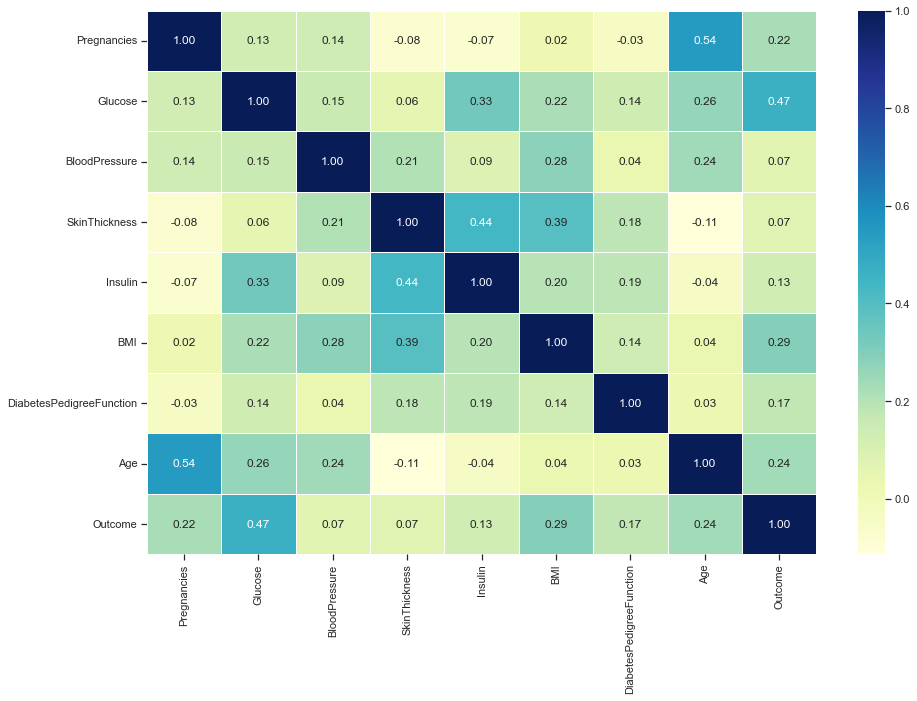

In [16]:
# correlation matrix between columns
## It shows the correlation(positive,neagative) between different columns(only integer value columns) 
corr_matrix = dataset.corr()
# make our correlation matrix visual
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [17]:
# checking whether any correlation value is gretaer than 0.8 or not, if yes then we will take any one of the two parameter while training the model.
for i in range(0,8):
    for j in range(0,8):
        if(abs(corr_matrix.iloc[i,j])>0.8 and corr_matrix.iloc[i,j]!=1.0):
            print(corr_matrix.iloc[i,j])

<AxesSubplot:>

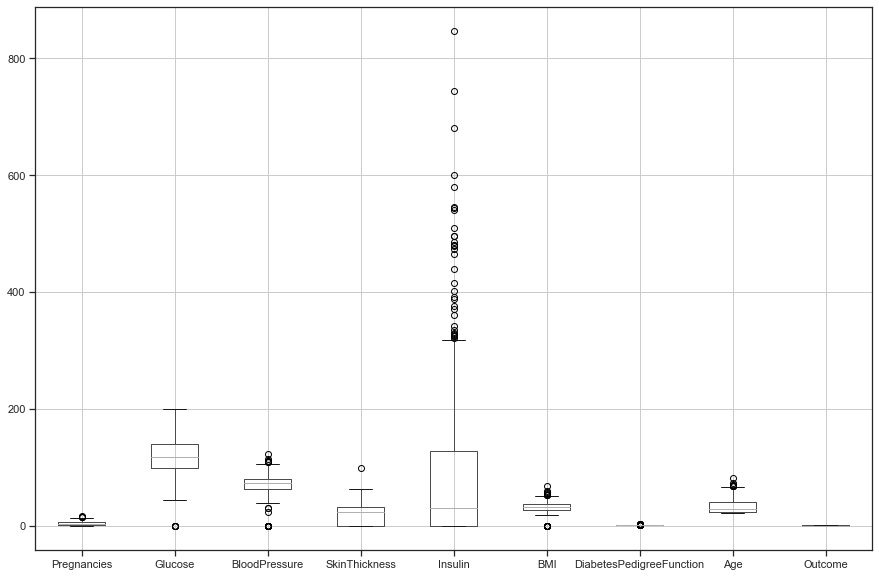

In [18]:
# finding outliers
import seaborn as sns
plt.figure(figsize=(15,10))
dataset.boxplot()

## Feature Engineering

In [19]:
# # we can see that there are lots of outliers on insulin column, hence we will remove it.
# dataset['Insulin']=np.where(dataset['Insulin']>dataset['Insulin'].quantile(0.95),dataset['Insulin'].quantile(0.75),dataset['Insulin'])
# sns.boxplot(dataset['Insulin'])

In [20]:
# # since blood pressure can never be zero, hence we try to remove the outlier.
# dataset['BloodPressure']=np.where(dataset['BloodPressure']>dataset['BloodPressure'].quantile(0.95),dataset['BloodPressure'].quantile(0.75),dataset['BloodPressure'])
# sns.boxplot(dataset['BloodPressure'])

In [21]:
# dataset['BMI']=np.where(dataset['BMI']>dataset['BMI'].quantile(0.95),dataset['BMI'].quantile(0.75),dataset['BMI'])
# sns.boxplot(dataset['BMI'])

# Modeling and Training

In [22]:
# random data shuffelin
dataset.sample(frac=1)
#Spliting the data
X = dataset.drop("Outcome",axis=1)
y = dataset["Outcome"]
# X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [23]:
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

## Splitting the data

In [24]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
(len(X_train),len(X_test))

(614, 154)

In [26]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
525            3       87             60             18        0  21.8   
465            0      124             56             13      105  21.8   
363            4      146             78              0        0  38.5   
147            2      106             64             35      119  30.5   
21             8       99             84              0        0  35.4   
..           ...      ...            ...            ...      ...   ...   
140            3      128             78              0        0  21.1   
616            6      117             96              0        0  28.7   
586            8      143             66              0        0  34.9   
553            1       88             62             24       44  29.9   
232            1       79             80             25       37  25.4   

     DiabetesPedigreeFunction  Age  
525                     0.444   21  
465                     0.452   21  


## Feature Scaling

In [27]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

We are going to train our model on 4 algorithms  
1.Logistic Regression  
2.KNN  
3.Random Forest Classifier  
4.Support Vector Machine  

In [28]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
## Build an model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [30]:
## Build an model (Random forest classifier)
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [31]:
## Build an model (Support Vector Machine)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
## Evaluating the model
svm = svm.score(X_test,y_test)

In [32]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.811688,0.707792,0.792208,0.75974


In [33]:
# print("Log reg : ", log_reg)
# print("knn : ", knn)
# print("Random Forest : ", clf)
# print("svm : ", svm)

### Let’s visualize the training performance of all the models

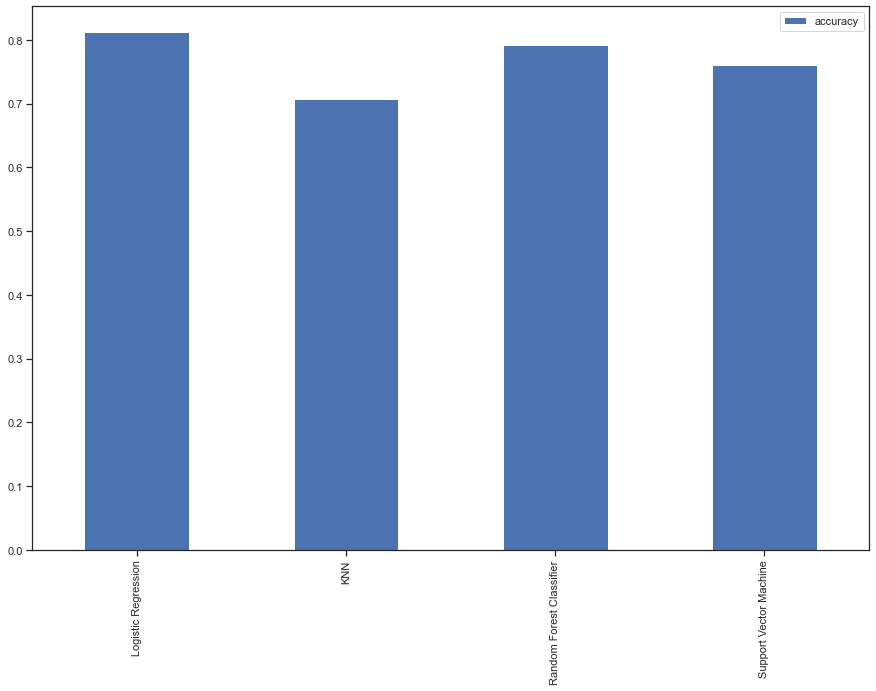

In [34]:
model_compare.T.plot.bar(figsize=(15,10));

Here we can see both SVM and Logistic Regression are performing very well with an accuracy of 81%. 
we can improve the accuracy more using Hyperparameter tuning.

### Improving accuracy using Hyperparameter tuning
We are going to use both grid search cv and RandomizedSearchcv for our hyperparameter turning.
In the logistic regression parameter which we can be easily hyper tuned are C and solver .

### Hyperparameter Tuning using RandomizedSearchcv

In [35]:
# Create a hyperparameter grid for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
79.87012987012987


In [ ]:
score = rs_log_reg.score(X_test,y_test)
print(score*100)

Great, Using Randomized Search cv we have increased the accuracy by 2%.

### Hyperparameter Tuning using GridSearchcv

In [36]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {'C': np.logspace(-4,4,30),
"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                           verbose=True)
#fit grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
79.87012987012987


In [ ]:
score = gs_log_reg.score(X_test,y_test)
print(score*100)

Great, Using Grid Search CV we have increased the accuracy by up to 2.5%.

Best Model is logistic Regression with 83% accuracy

#### Evaluate the model
Let’s Predict X_test first

In [37]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

#### Let see the confusion matrix, accuracy score, classification report, and roc curve.
### confusion matrix

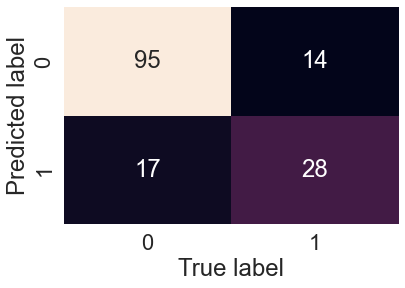

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

### accuracy score

In [39]:
print(accuracy_score(y_test,y_preds))

0.7987012987012987


## Classification Report

In [40]:
print(classification_report(y_test, y_preds))

NameError: name 'classification_report' is not defined

# 2. Training and fitting the data using support vector classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Evaluating the model (calculating confusion matrix and accuracy score)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)